<a href="https://colab.research.google.com/github/Krshnna/Exploratory-Data-Analysis/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='unicode-escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [24]:
df.shape

(11251, 15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [26]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [27]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [28]:
df.dropna(inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [30]:
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)
df.head()

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


EDA

1. Gender

  what is the count of males and females in order

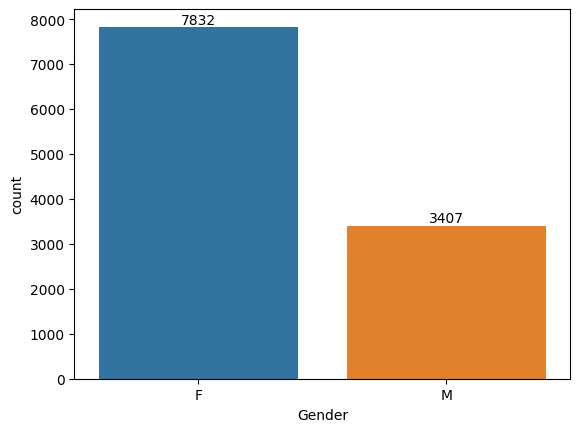

In [41]:
ax = sns.countplot(x = 'Gender', data = df)


# to map the count of each category
for bar in ax.containers:
  ax.bar_label(bar)

# this countplot shows that females made more purchases as compare to males

Now check for the age-groups which made maximum purchase


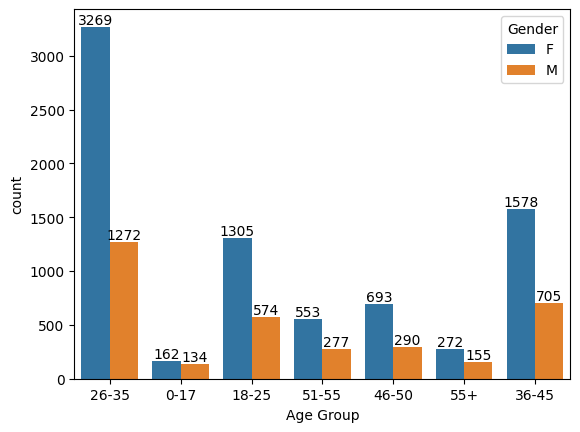

In [45]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

for bars in ax.containers:
  ax.bar_label(bars)

# this shows that maximum orders are from age-group - 26-25, in which females made more purchase than males

Lets check whether married or unmarried made more purchase ?


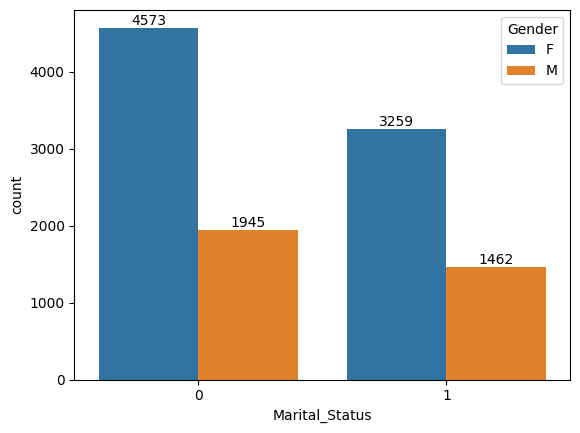

In [49]:
ax = sns.countplot(x = 'Marital_Status', hue = 'Gender', data = df)

for bars in ax.containers:
  ax.bar_label(bars)

Now check total amount spend by which gender ??


In [55]:
sales = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sales

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

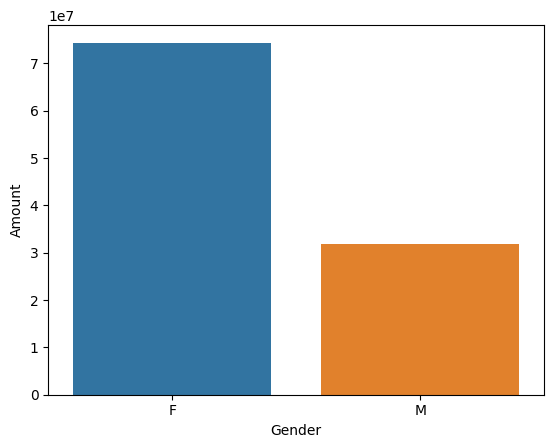

In [56]:
sns.barplot(x = 'Gender', y = 'Amount', data = sales)

In [57]:
df.head()

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [58]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

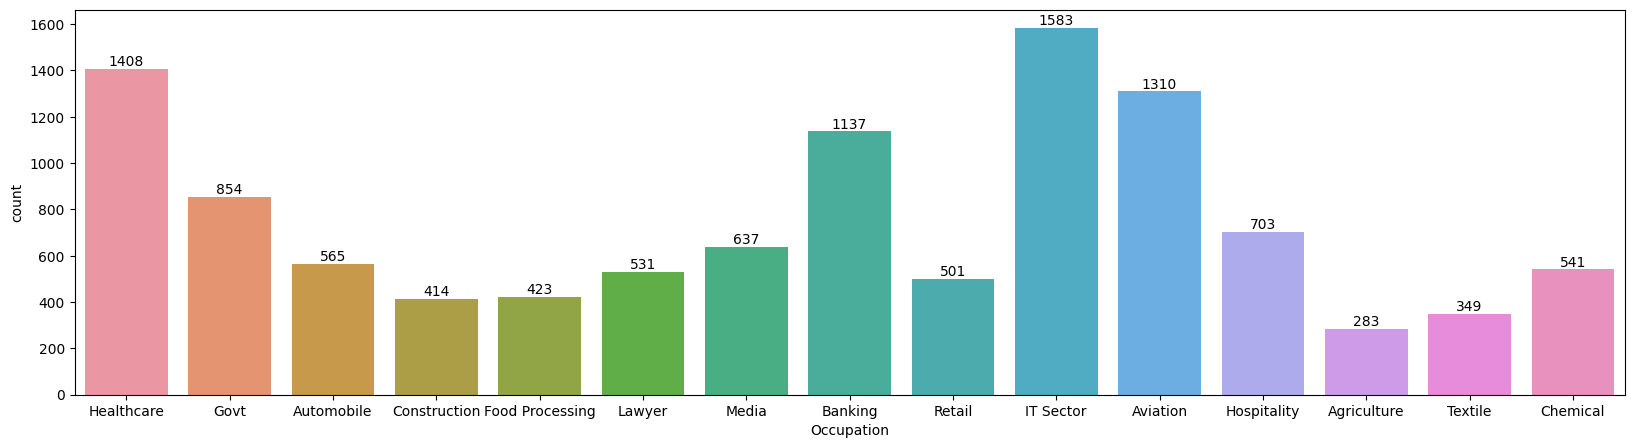

In [88]:
ax = sns.countplot(x = 'Occupation', data = df)
for bar in ax.containers:
  ax.bar_label(bar)

## Now check for amount spend by person with there corresponding occupation

<Axes: xlabel='Occupation', ylabel='Amount'>

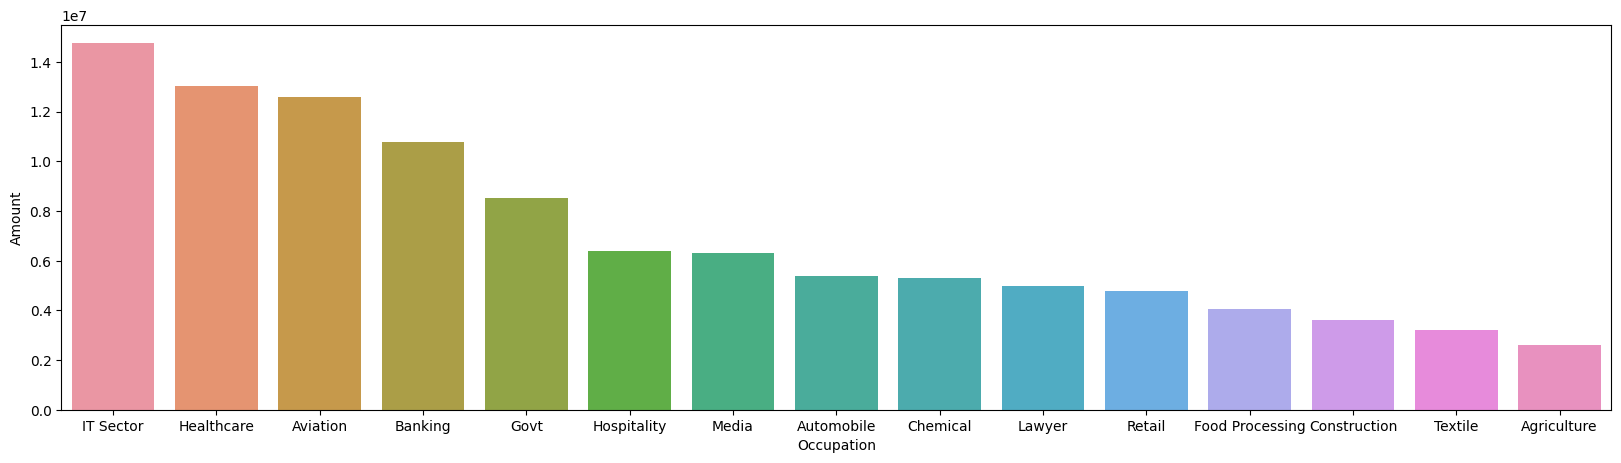

In [86]:
plt.rcParams['figure.figsize'] = (20, 5)

spending_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Occupation', y = 'Amount', data = spending_occ)

# we can see that people from every occupation has spend almost equal amount but if sees highest then government officals has spend maximum amount

## Now check top 10 state which make highest orders

In [71]:
states_top10 = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
states_top10

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


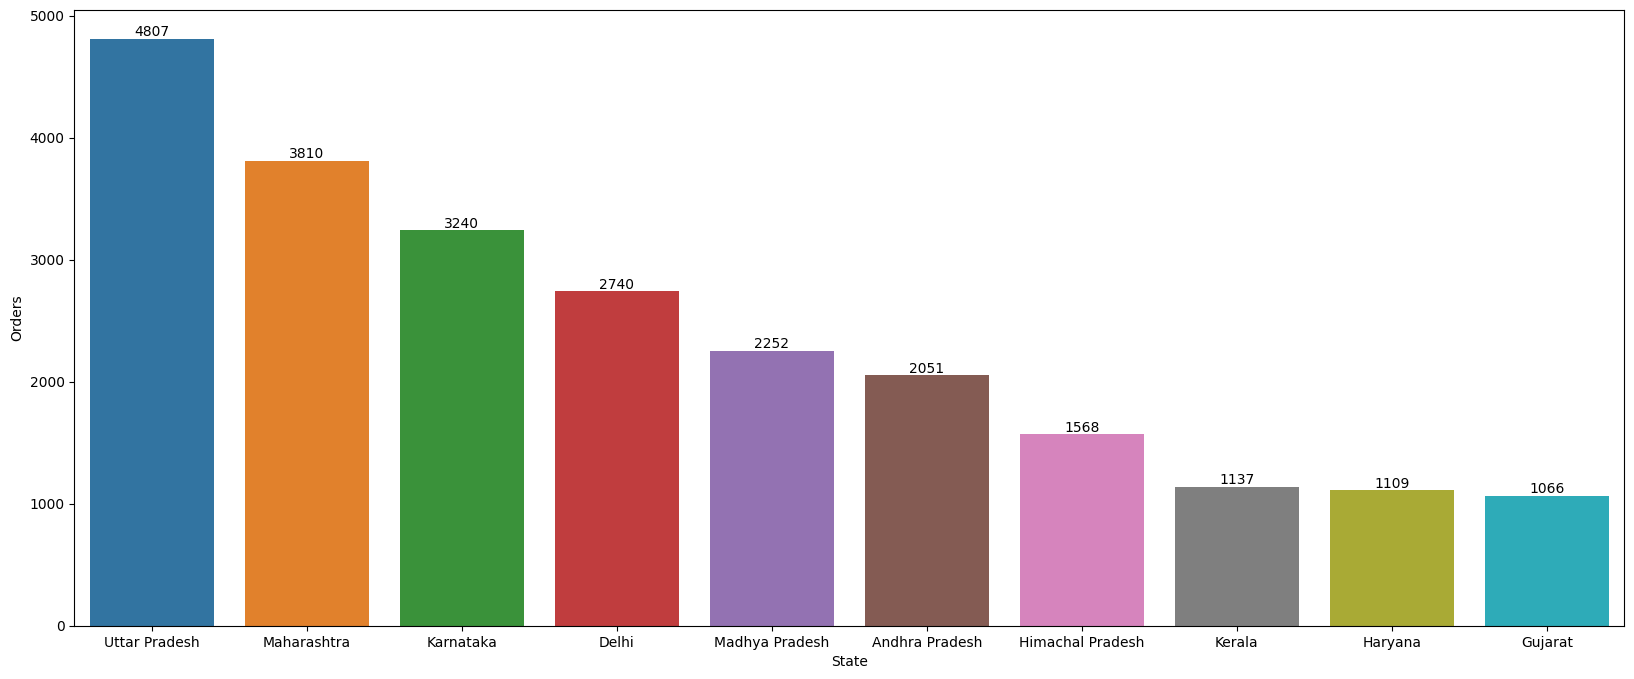

In [73]:
ax = sns.barplot(x = 'State', y = 'Orders', data = states_top10)

for bar in ax.containers: 
  ax.bar_label(bar)


# We can easily see that highest orders are received from Uttar Pradesh

Now Check for total amount collected from top 10 states

In [75]:
amount_generated = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
amount_generated

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


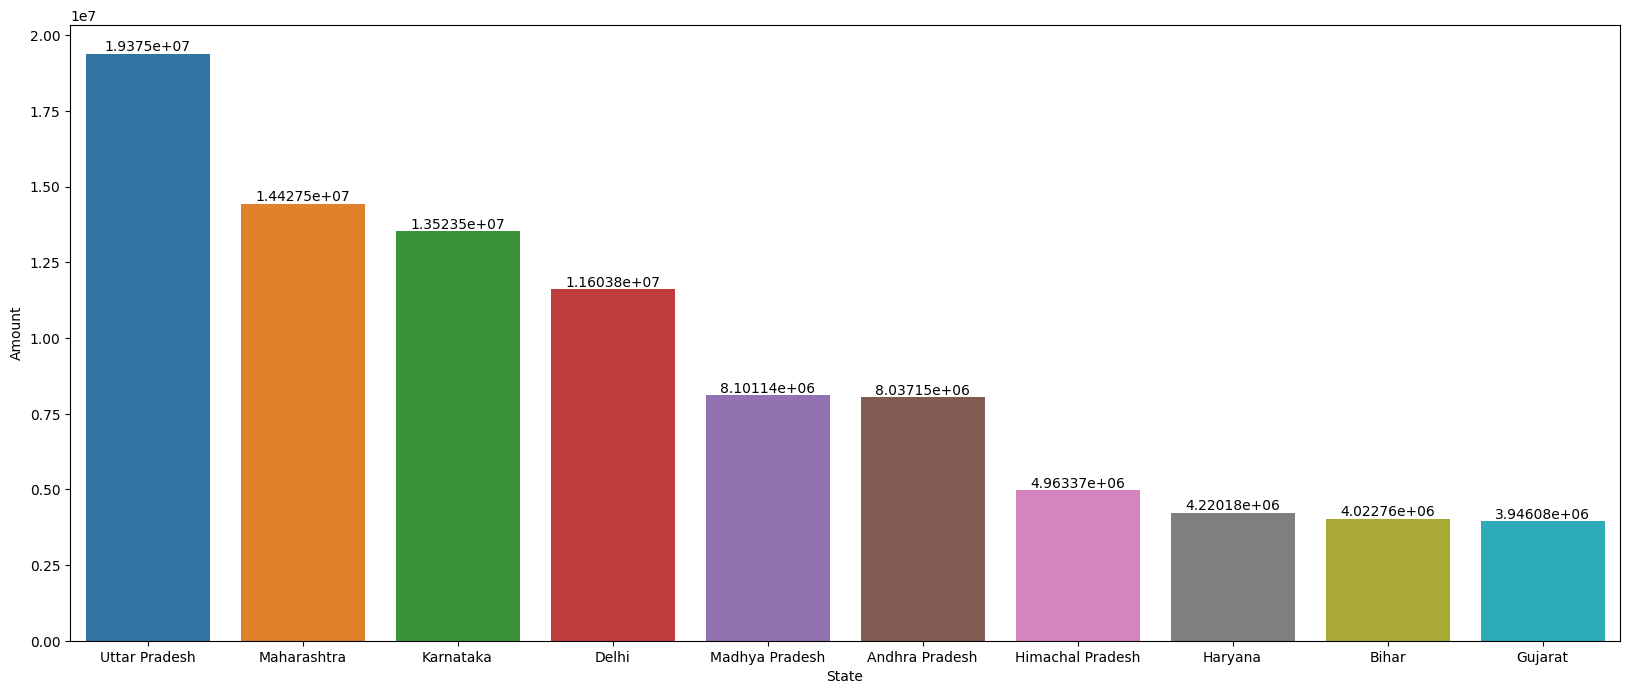

In [78]:
ax = sns.barplot(x = 'State', y = 'Amount', data = amount_generated)
for bars in ax.containers:
  ax.bar_label(bars)

# // maximum amount is collected from Uttar Pradesh

Now Check for which category is sold more

<Axes: xlabel='Product_Category', ylabel='count'>

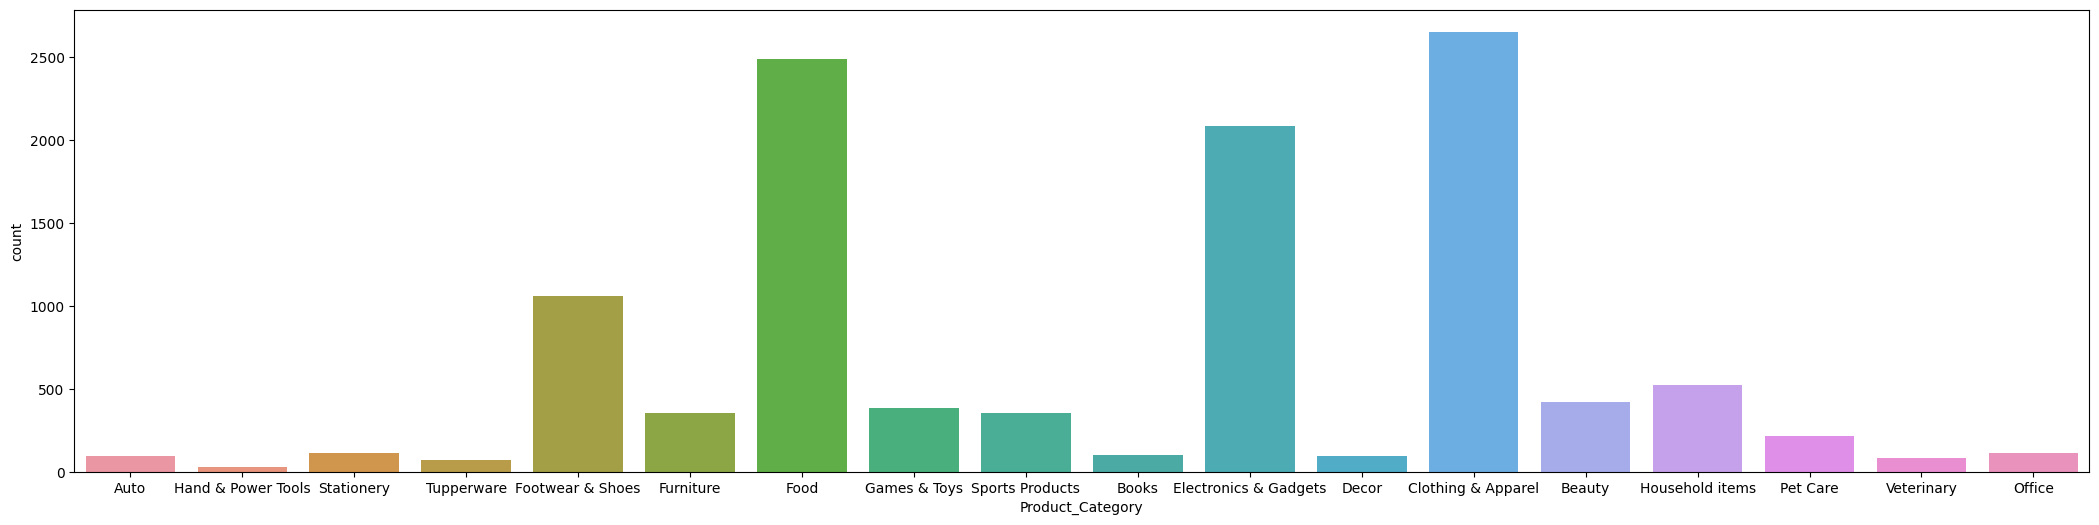

In [93]:
plt.rcParams['figure.figsize'] = (26, 6)
sns.countplot(x = 'Product_Category', data = df)

<Axes: xlabel='Product_Category', ylabel='Amount'>

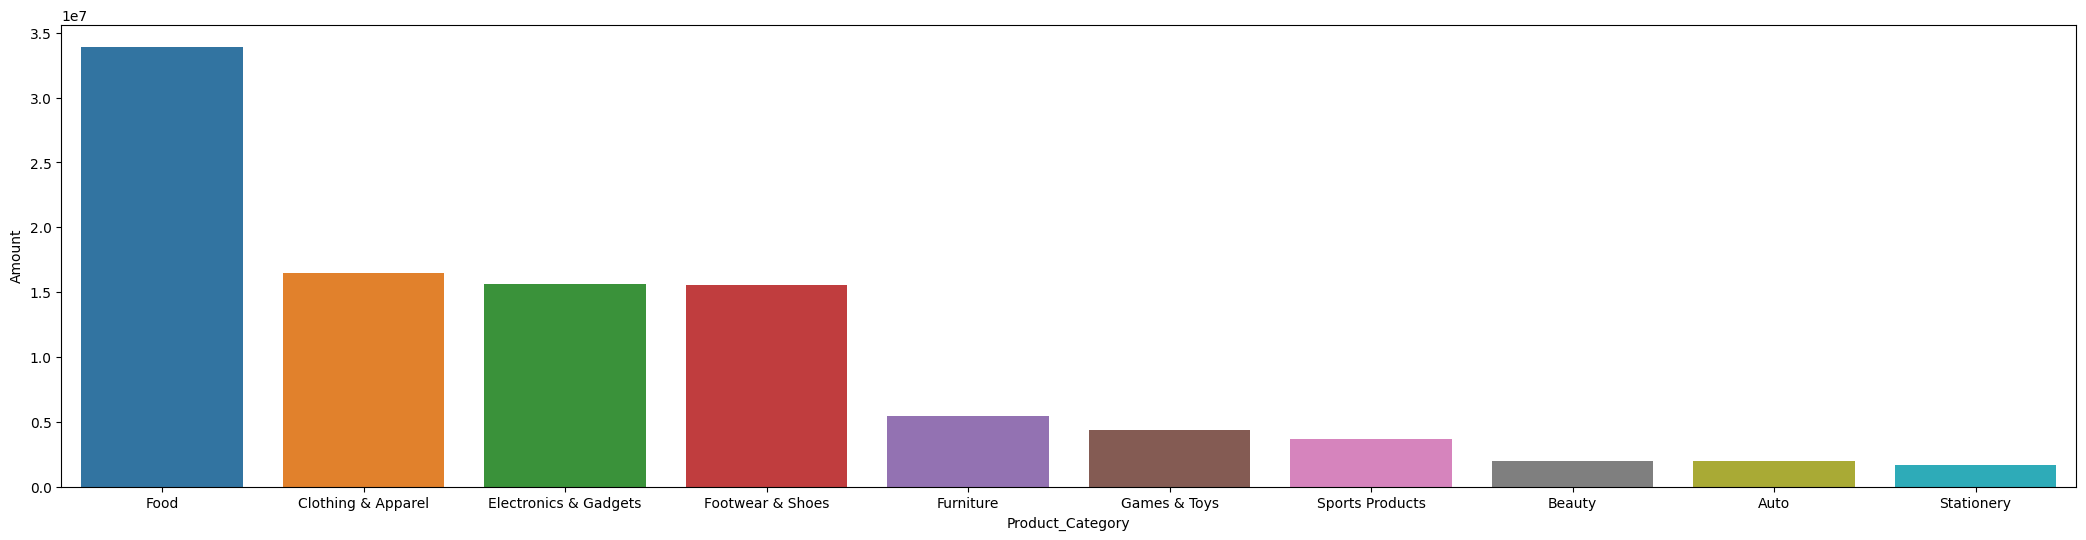

In [96]:
prod = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.rcParams['figure.figsize'] = (26, 6)
sns.barplot(x = 'Product_Category', y = 'Amount', data = prod)


# we can see that highest sold product is food and then clothing, electronics, etc

After doing complete Exploratory data analysis we can now conclude that

1. Highest buyers are married females from age group between 26-35 years
2. Highest Counts are from IT Sectors
3. Highest Numbers of orders are received from Uttar Pradesh
4. Maximum amount is also collected from Uttar Pradesh
5. Maximum Number of products that are sold is food, clothing, electronics and footwears. 
